## Visualization of the classification metrics

In this notebook, using the results of the grid search, different modeling algorithms are compared based on various classification metrics (accuracy, recall, F$_1$ score, and recognition rate).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%config InlineBackend.figure_format='retina'
%matplotlib inline

In [2]:
df_pca  = pd.read_csv('results_pca.csv')
df_deep = pd.read_csv('results_deep.csv')
df = pd.concat([df_pca, df_deep], sort=False, ignore_index=True)
df

,model,best_params,train_accuracy,test_accuracy,train_recall,test_recall,train_f1,test_f1,RR
0,LogisticRegression,"{'C': 0.024244620170823284, 'penalty': 'l1'}",0.744371,0.782328,0.932798,0.855114,0.933735,0.856330,0.766696
1,KNN,"{'n_neighbors': 5, 'weights': 'uniform'}",0.774834,0.855603,0.948847,0.963068,0.861566,0.910067,0.831977
2,GaussianNB,{},0.498675,0.245690,0.586760,0.039773,0.646766,0.074074,0.298624
3,RandomForest,"{'max_depth': None, 'n_estimators': 100}",0.670199,0.780172,1.000000,0.997159,1.000000,0.873134,0.731412
4,AdaBoost,{'n_estimators': 200},0.729139,0.780172,1.000000,0.909091,1.000000,0.862534,0.759151
5,GradientBoost,{'n_estimators': 150},0.760265,0.810345,0.998997,0.931818,0.999498,0.881720,0.792035
6,SVM,"{'C': 0.5878016072274912, 'gamma': 1e-05}",0.785430,0.790948,0.929789,0.892045,0.892204,0.866207,0.760555
7,AlexNet,NaN,0.858278,0.844828,0.971916,0.963068,0.900558,0.904000,0.822663
8,Spanhol,NaN,0.971523,0.855603,0.990973,0.960227,0.978702,0.909825,0.836114


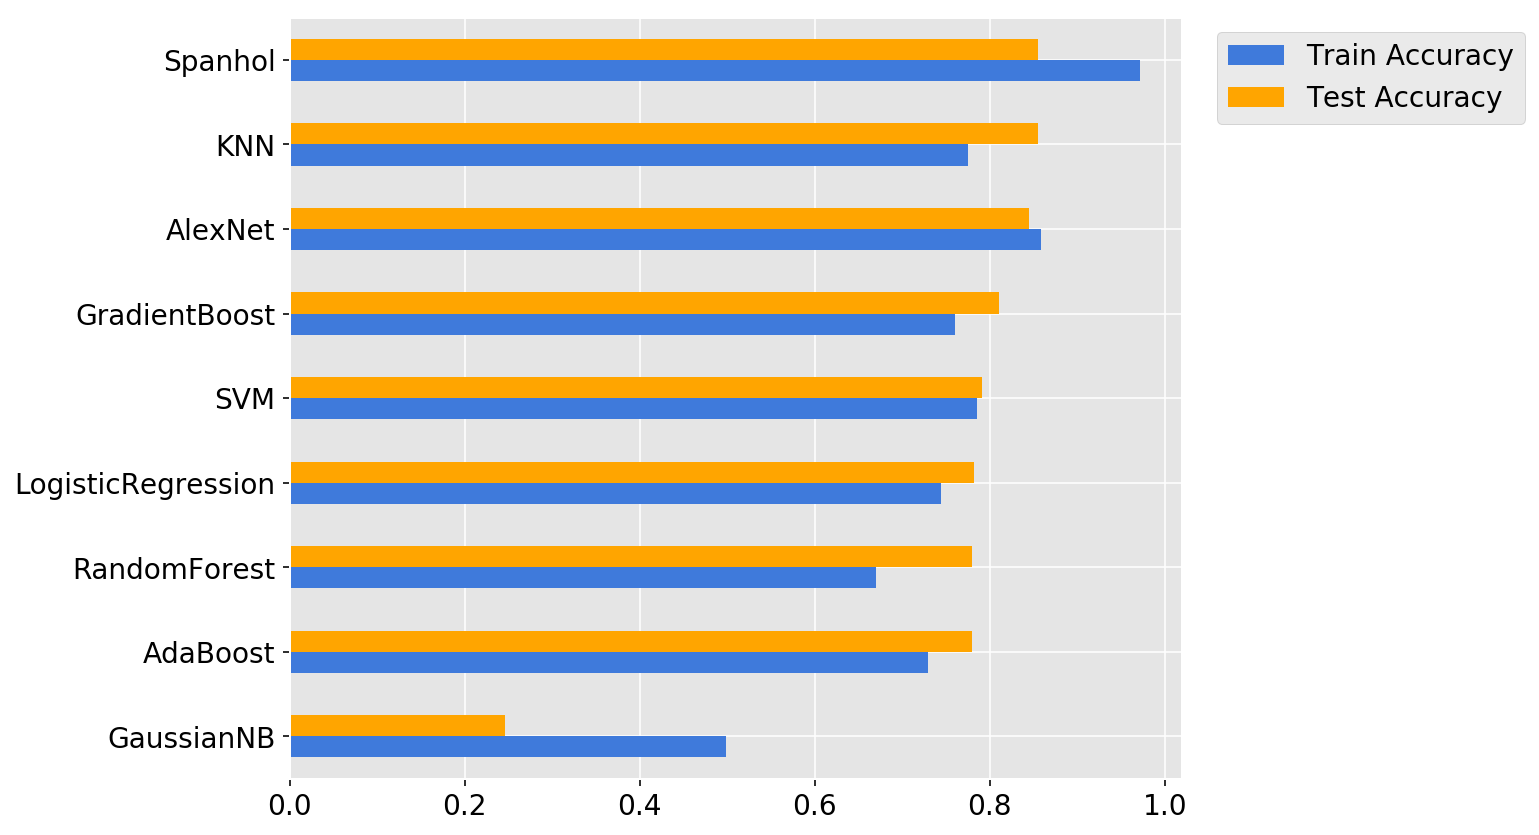

In [3]:
fig, ax = plt.subplots(figsize=(8, 7))
df.pivot_table(index='model')[['train_accuracy', 'test_accuracy']].sort_values(by='test_accuracy') \
    .plot(kind='barh', ax=ax, color=['#3f7adb', 'orange'])

ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.set_ylabel(None)
ax.tick_params(colors='black')
ax.legend(['Train Accuracy', 'Test Accuracy'], fontsize=14, loc='upper right', bbox_to_anchor=(1.4, 1));

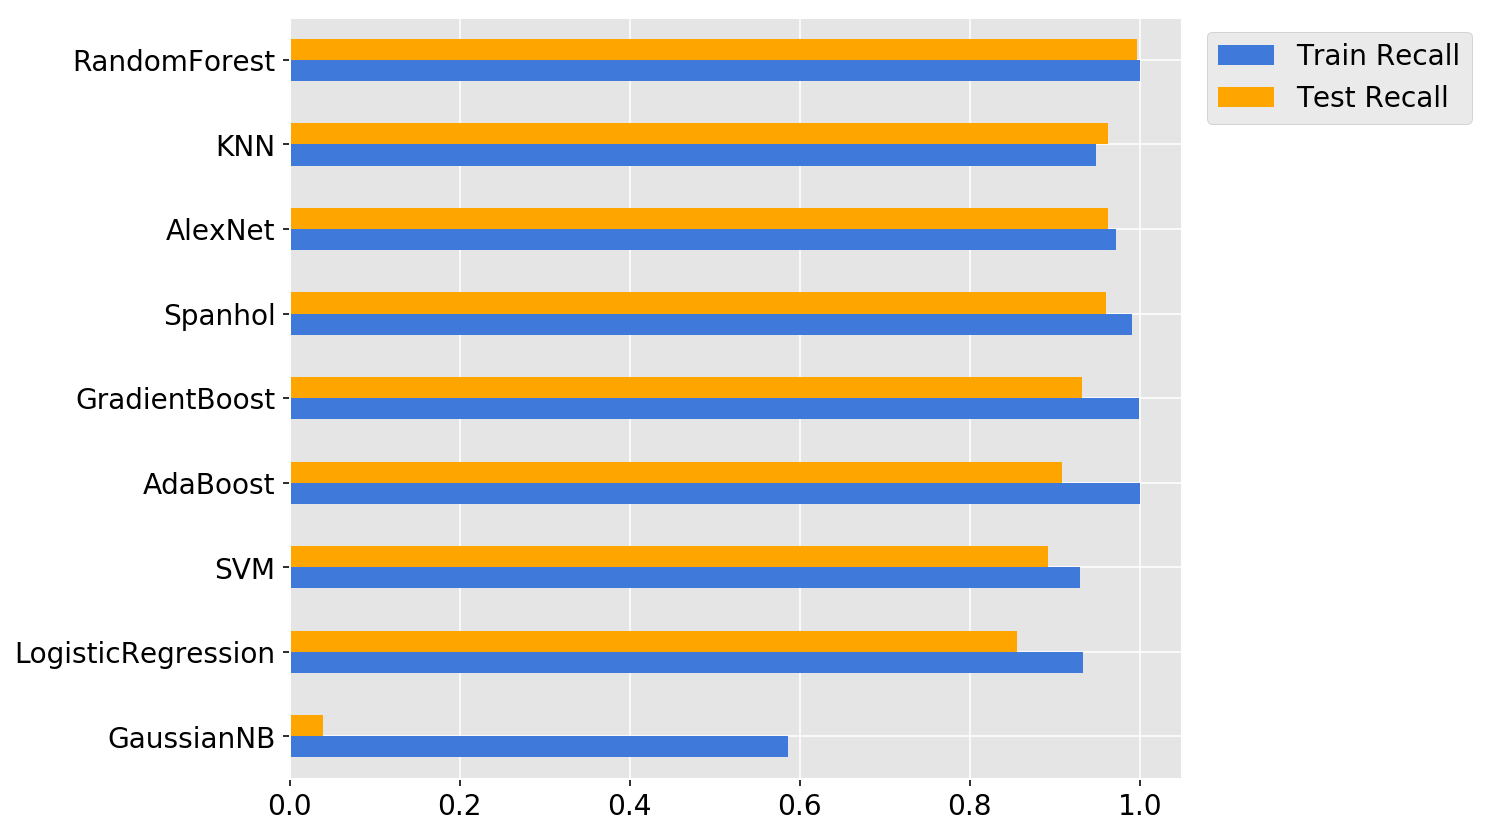

In [4]:
fig, ax = plt.subplots(figsize=(8, 7))
df.pivot_table(index='model')[['train_recall', 'test_recall']].sort_values(by='test_recall') \
    .plot(kind='barh', ax=ax, color=['#3f7adb', 'orange'])

ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.set_ylabel(None)
ax.tick_params(colors='black')
ax.legend(['Train Recall', 'Test Recall'], fontsize=14, loc='upper right', bbox_to_anchor=(1.34, 1));

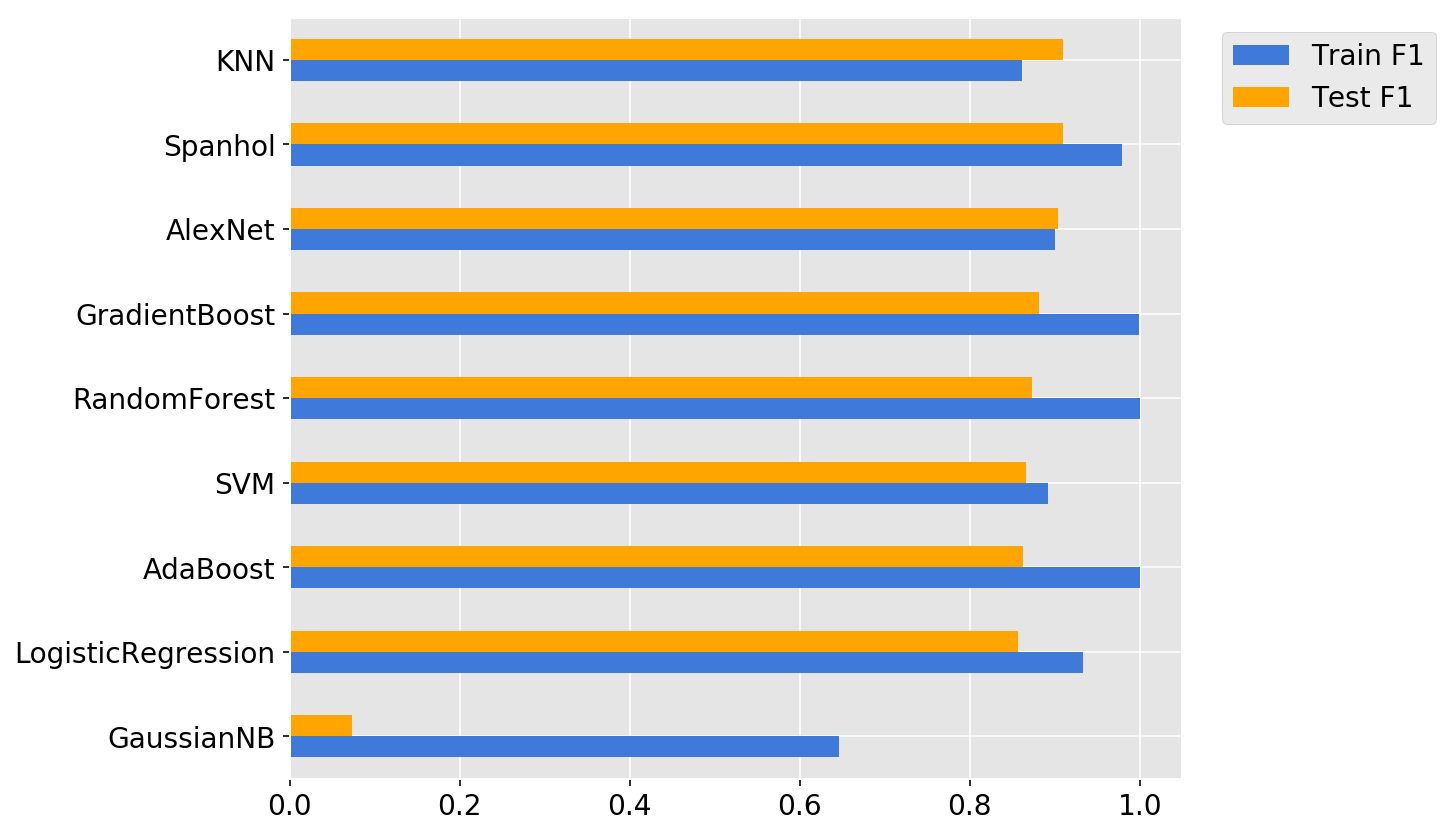

In [5]:
fig, ax = plt.subplots(figsize=(8, 7))
df.pivot_table(index='model')[['train_f1', 'test_f1']].sort_values(by='test_f1') \
    .plot(kind='barh', ax=ax, color=['#3f7adb', 'orange'])

ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.set_ylabel(None)
ax.tick_params(colors='black')
ax.legend(['Train F1', 'Test F1'], fontsize=14, loc='upper right', bbox_to_anchor=(1.3, 1));

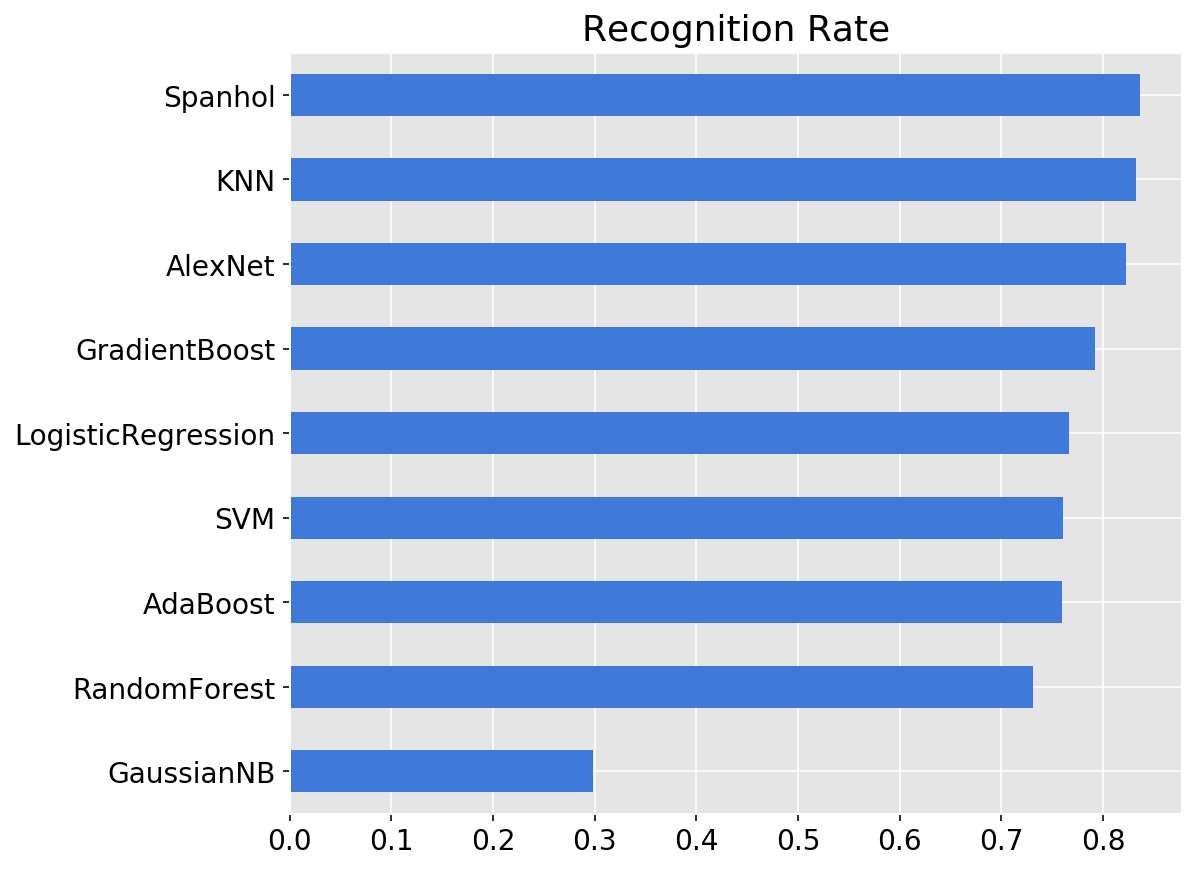

In [6]:
fig, ax = plt.subplots(figsize=(8, 7))
df.pivot_table(index='model')[['RR']].sort_values(by='RR') \
    .plot(kind='barh', ax=ax, color='#3f7adb', legend=False)

ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.set_ylabel(None)
ax.tick_params(colors='black')
ax.set_title('Recognition Rate', fontsize=18);